In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option("display.precision", 4)

plt.style.use('dark_background')

# Load data

In [8]:
from sklearn.datasets import load_iris, load_digits

data = load_digits()

X = data.data
y = data.target

X[:2,:]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

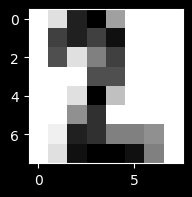

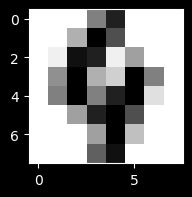

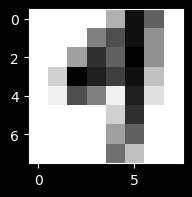

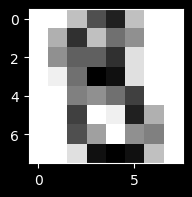

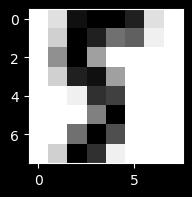

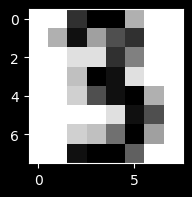

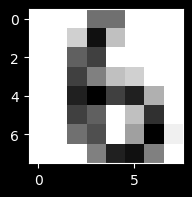

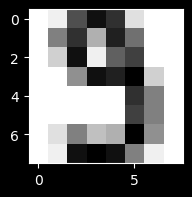

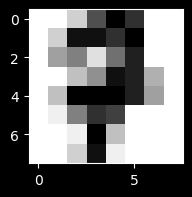

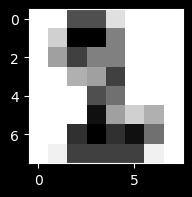

In [13]:
for i in np.random.choice( range(X.shape[0]), size=10 ).astype(int):
    x = 15 - X[i,:].reshape(8,8)
    plt.figure(figsize=(2,2))
    plt.imshow(x, cmap='gray')
    plt.show()

# Compare dim red methods

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

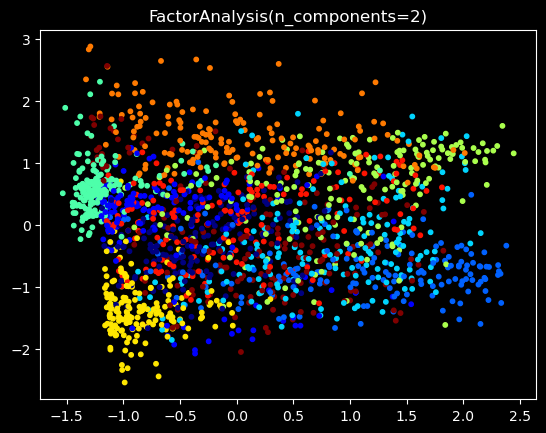

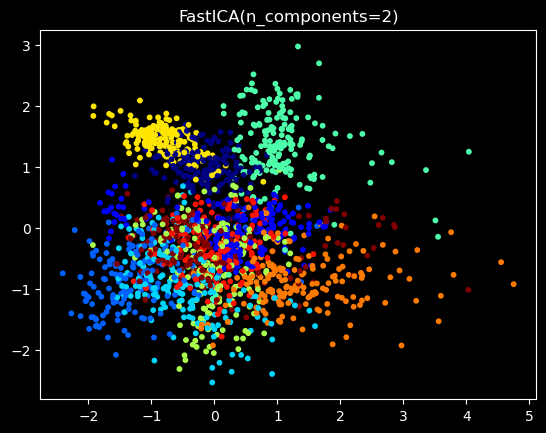

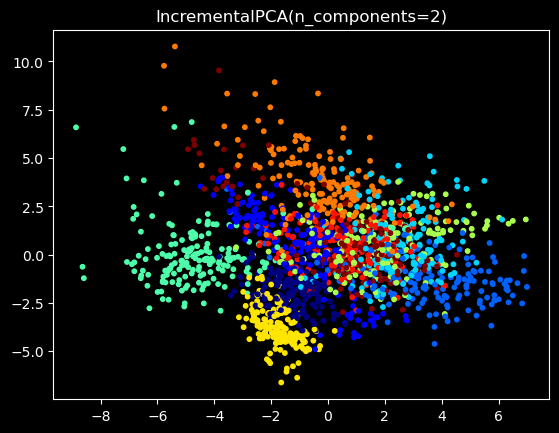

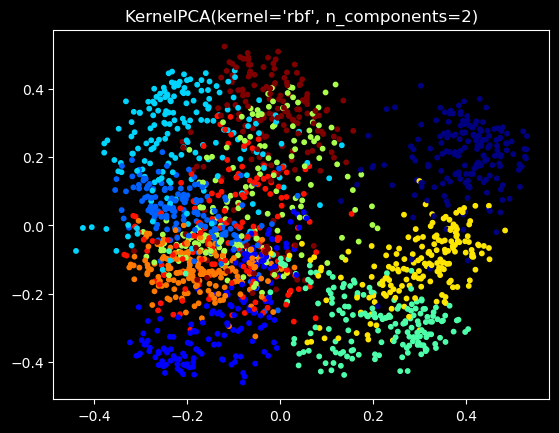

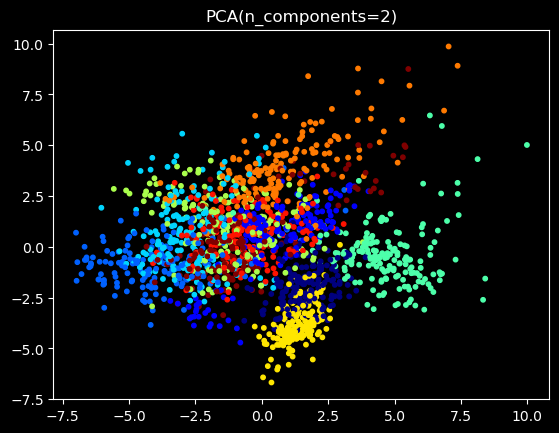

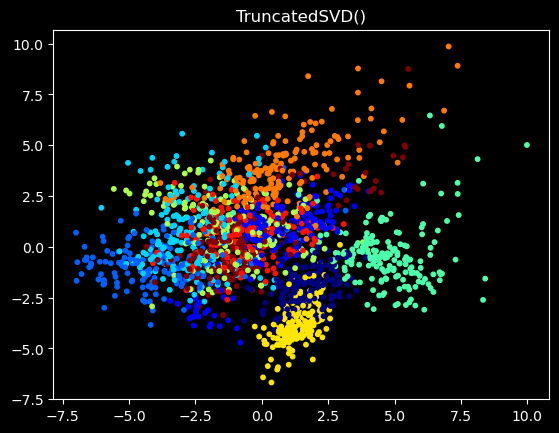

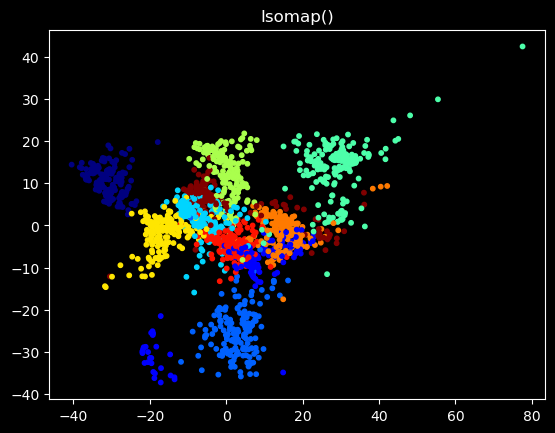

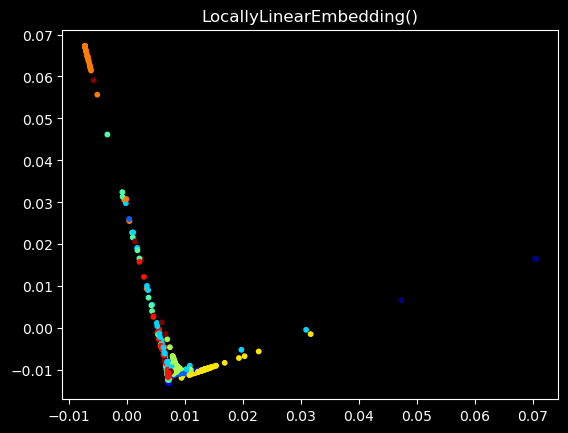

C:\Users\Graham West\anaconda3\envs\csci4900\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


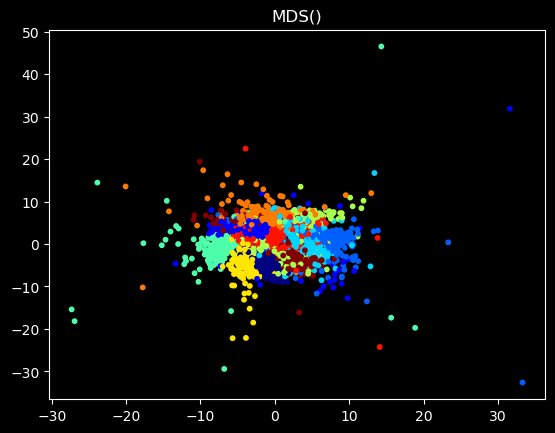

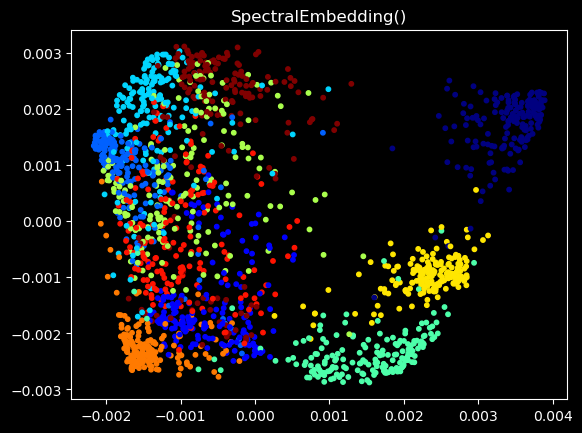

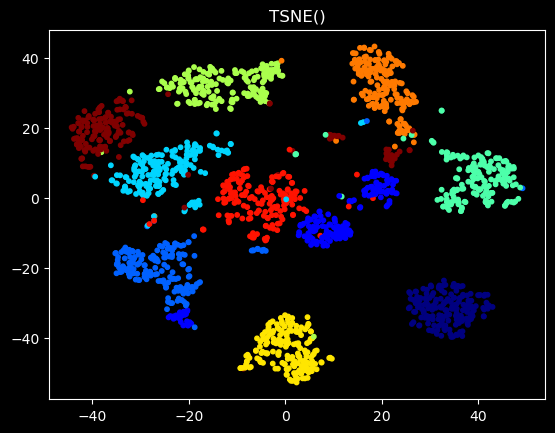

In [15]:
from sklearn.decomposition import (
    FactorAnalysis,
    FastICA,
    IncrementalPCA,
    KernelPCA,
    PCA,
    TruncatedSVD
)
from sklearn.manifold import (
    Isomap,
    MDS,
    SpectralEmbedding,
    TSNE
)

decomps = [
    # decomposition
    FactorAnalysis(n_components=2),
    FastICA(n_components=2),
    IncrementalPCA(n_components=2),
    KernelPCA(n_components=2, kernel='rbf'),
    PCA(n_components=2),
    TruncatedSVD(n_components=2),
    # manifold
    Isomap(n_components=2),
    MDS(n_components=2),
    SpectralEmbedding(n_components=2),
    TSNE(n_components=2)
]

n_decomp = len(decomps)

Xs = [ X ]
for i, model in enumerate(decomps):
    Xs.append( model.fit_transform(X) )
    
    plt.scatter(Xs[i+1][:,0],Xs[i+1][:,1], c=y, s=10, cmap='jet')
    plt.title( str(model) )
    plt.show()
# end

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the dataset into training and testing sets
idx_train, idx_test = train_test_split(range(X.shape[0]),
                                       test_size=0.2,
                                       stratify=y)

y_train = y[idx_train]
y_test = y[idx_test]

model = RandomForestClassifier(n_estimators=100)

for i in range(len(Xs)):
    X_train = Xs[i][idx_train]
    X_test  = Xs[i][idx_test]
    
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    
    if i==0:
        print('no dimensional reduction')
    else:
        print(decomps[i-1])
    # end
    
    print(classification_report(y_test, y_test_pred))
# end

no dimensional reduction
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        37
           2       1.00      0.97      0.99        35
           3       0.95      1.00      0.97        37
           4       1.00      0.97      0.99        36
           5       0.97      0.97      0.97        36
           6       0.97      1.00      0.99        36
           7       0.94      0.94      0.94        36
           8       1.00      0.91      0.96        35
           9       0.92      0.94      0.93        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

FactorAnalysis(n_components=2)
              precision    recall  f1-score   support

           0       0.29      0.44      0.35        36
           1       0.42      0.41      0.41        37
           2       0.3